# Plotting with matplotlib (3)

[Matplotlib](https://matplotlib.org/) is a powerful and very popular data visualization library in Python.

# Specialized visualization tools: pie charts, scatter plots, box plots

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Pie Charts

* A `pie chart` is a circular graphic that displays numeric proportions associated to data.
* This is done by dividing a circle (or pie) into proportional slices. 
* Pie charts are widely used in business and media.

See examples from Matplotlib: https://matplotlib.org/stable/gallery/pie_and_polar_charts/index.html

## First Example

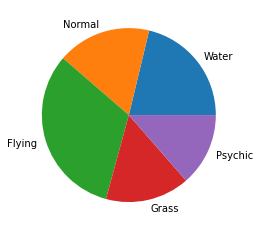

In [2]:
# Create a pie chart of the number of Pokemon by type
types = ['Water', 'Normal', 'Flying', 'Grass', 'Psychic']
poke_num = [133, 109, 201, 98, 85]

plt.pie(poke_num, labels=types)
plt.show()

# also can be done with:
#fig, ax = plt.subplots()
#ax.pie(sizes, labels=labels)

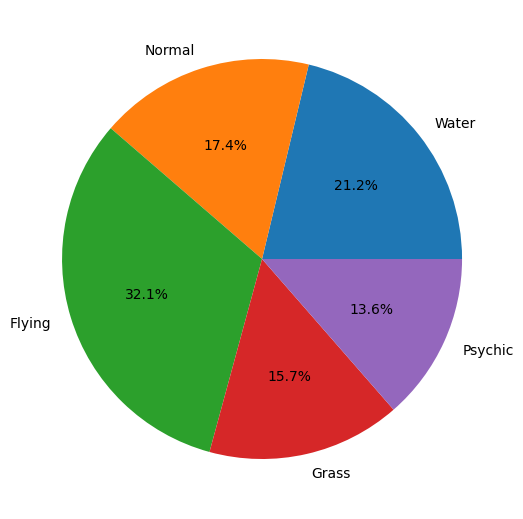

In [3]:
#auto-label slices
fig = plt.figure(figsize=(8,5),dpi=100)
ax = fig.add_axes([0,0,1,1])

plt.pie(poke_num, labels=types, autopct='%1.1f%%')
plt.show()

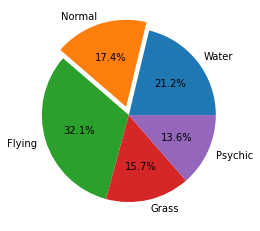

In [4]:
# explode slices

explode = (0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Normal')

fig, ax = plt.subplots()
ax.pie(poke_num, labels=types, explode=explode, autopct='%1.1f%%')
plt.show()



## Pie with a legend

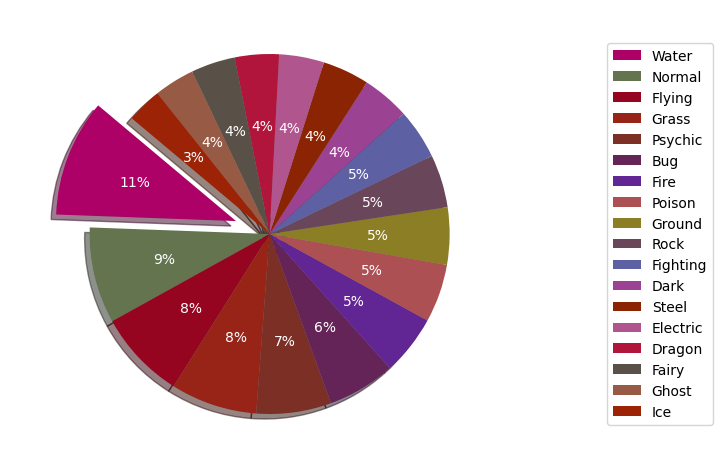

In [3]:
# add more data to the first example
types = ['Water', 'Normal', 'Flying', 'Grass', 'Psychic', 'Bug', 'Fire', 'Poison',
'Ground', 'Rock', 'Fighting', 'Dark', 'Steel', 'Electric', 'Dragon', 'Fairy',
'Ghost', 'Ice']
poke_num = [133, 109, 101, 98, 85, 77, 68, 66, 65, 60, 57, 54, 53, 51, 50, 50, 46, 40]

fig = plt.figure(figsize=(8,5),dpi=100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])

import random
colors = []
for i in range(len(types)):
    rgb = (random.uniform(0.3,.7), random.uniform(0,0.5), random.uniform(0,0.7))
    colors.append(rgb)
    
explode = [0] * len(types)
explode[0] = 0.2

wedges, text, autotexts = plt.pie(poke_num, explode=explode, labels=types, colors=colors, autopct='%1.0f%%', shadow=True, startangle=140, textprops=dict(color="w"))

plt.legend(wedges, types, loc='right', bbox_to_anchor=[1, 0, 0.5, 1])

Note that:
*   `autopct` -  is a string or function used to label the slices with their numeric value. The label will be placed inside the slice. If it is a format string, the label will be `fmt%pct`.
*   `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
*   `shadow` - Draws a shadow beneath the pie (to give a 3D feel).

**<p style="color:red">EXERCISE 1</p>**

Create a pie chart for the same data as above with a figure size of (10,8). Make sure that:
* You specify the colors for each slice.
* Place the labels inside the slices and the percentages outside the pie.
* Explode two slices: Flying and Psychic.
* Add a shadow.
* Use the option `startangle` with a value of 90 and check the effect.

Hint. *Use the labeldistance and pctdistance parameters to position the labels and autopct text respectively.* (See Matplotlib Documentation)

In [5]:
# Your solution here...



## Pie Charts for the Canada Immigration Dataset
*Dataset Preparation*

In [5]:
df_canada = pd.read_excel("data/Canada.xlsx", 
                    sheet_name="Canada by Citizenship",
                    skiprows=range(20),
                    skipfooter=2)
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
# 1. Remove columns that are not necessary
df_canada.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# 2. Rename some columns
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# 3. Column labels should be strings
df_canada.columns = list(map(str, df_canada.columns))

# 4. Set the index to the country column
df_canada.set_index('Country', inplace=True)

# 5. Add an extra column: Total
df_canada['Total'] = df_canada.sum(axis=1, numeric_only = True)

# Create a list of years from 1980 - 2013 as strings
years = list(map(str, range(1980, 2014)))

In [7]:
print('data dimensions:', df_canada.shape)
df_canada.head()

data dimensions: (195, 38)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


**Use a pie chart to explore the percentage of immigrants grouped by continents for the period from 1980 to 2013.**

In [8]:
mpl.style.use('ggplot') # optional: for ggplot-like style

The method `groupby` from  *pandas* can be used first to get the data summarized by `Continent`. This involves the following steps:

1.  **Split:** Splitting the data into groups based on some criteria.
2.  **Apply:** Applying a function to each group independently:
    .sum()
    .count()
    .mean()
    .std()
    .aggregate()
    .apply()
    .etc..
3.  **Combine:** Combining the results into a data structure.

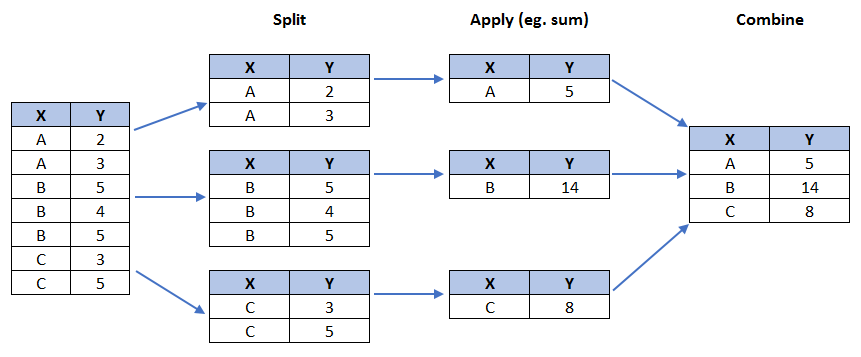

In [9]:
df_continents = df_canada.groupby('Continent', axis=0).sum(numeric_only = True)

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
# print(type(df.groupby('Continent', axis=0)))

df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


To plot the data as a pie, we need to pass in `kind = 'pie'` keyword to dataframe plot.

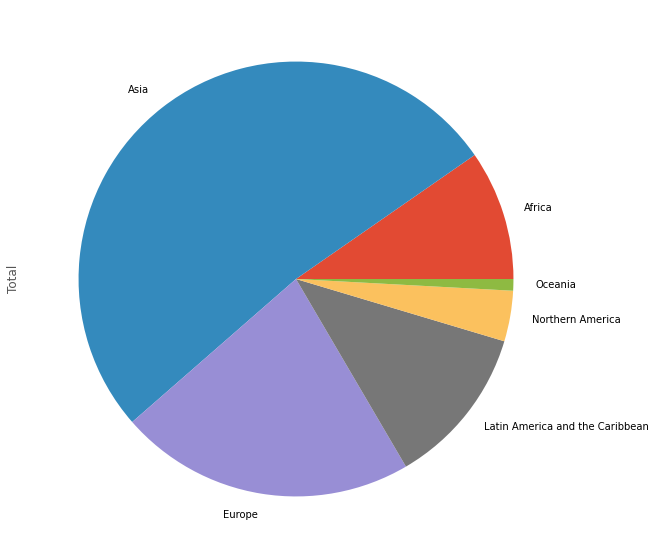

In [10]:
df_continents['Total'].plot(kind="pie", figsize=(10,10))

plt.show()

We can also set a plot title and several parameters...

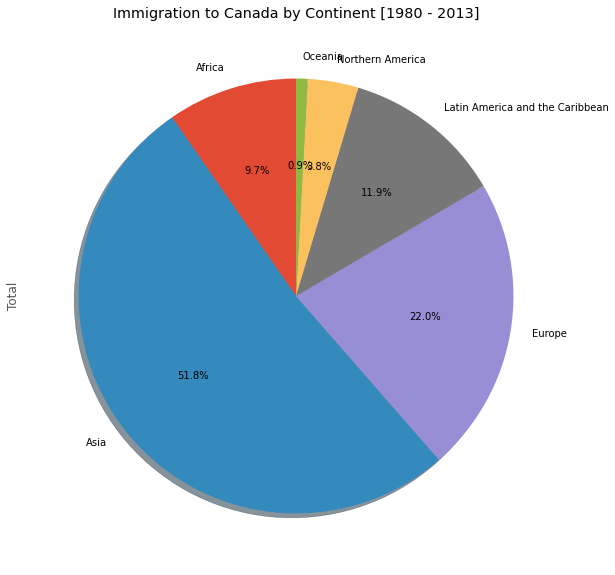

In [14]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(10, 10),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow  
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
#plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

We can make more changes to make it more clear:

*   Use a `legend` instead of labels.
*   Place the percentages outside the pie chart (`pctdistance` parameter).
*   Use a custom set of colors for continents (`colors` parameter).
*   Explode the slices for the lowest three continents (`explode` parameter).

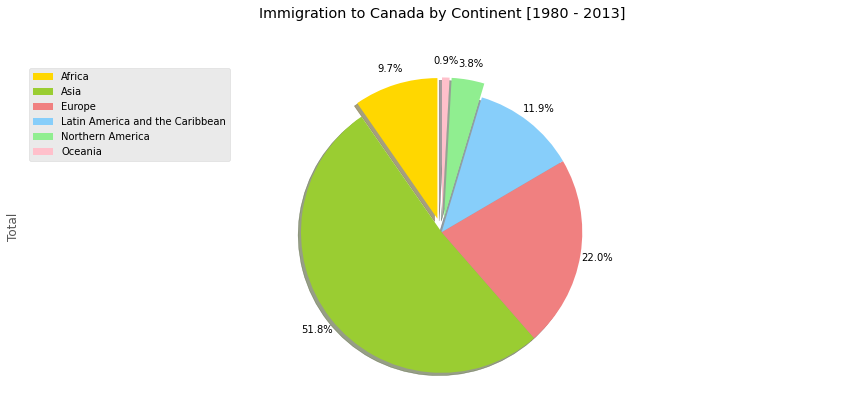

In [21]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

**<p style="color:red">EXERCISE 2</p>**

Create a pie chart to show the percentage of new immigrants grouped by continents in the year 2013.

* The plot should have a title.
* Use a custom color scheme for the slices.
* Show percentages on the slices with a custom color.
* Add a legend and do not show the labels.
* Use a shadow.
* Make any changes you think it make the plot better!

In [15]:
# Your solution here...




***

# Scatter Plots

A `scatter plot` (2D) is a useful method of comparing variables. `Scatter` plots look similar to `line plots` as they both map independent and dependent variables on a 2D graph. While the data points are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, it is possible to mathematically calculate this relationship and use it to predict trends outside the dataset.


## Syntax 

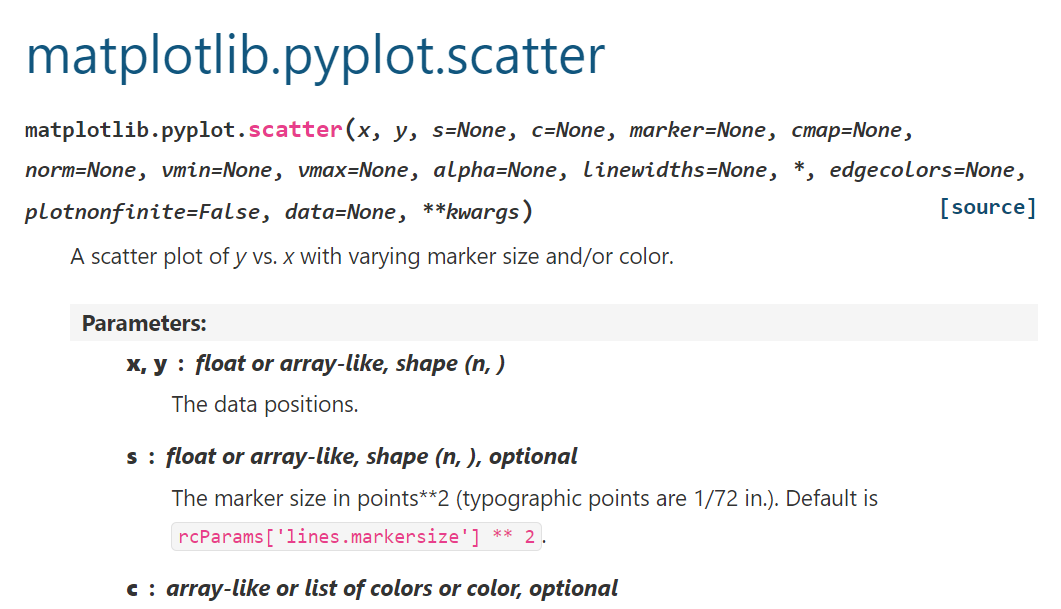

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

In [22]:
mpl.style.use('default')

## First Example

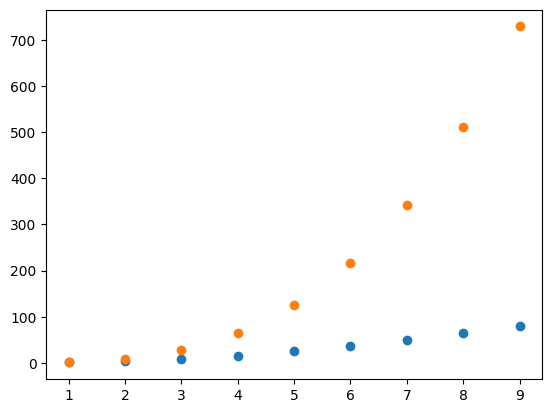

In [23]:
x =  [i for i in range(1,10)]
y1 = [i**2 for i in x]
y2 = [i**3 for i in x]
 
plt.scatter(x, y1)
plt.scatter(x, y2)
plt.show() 

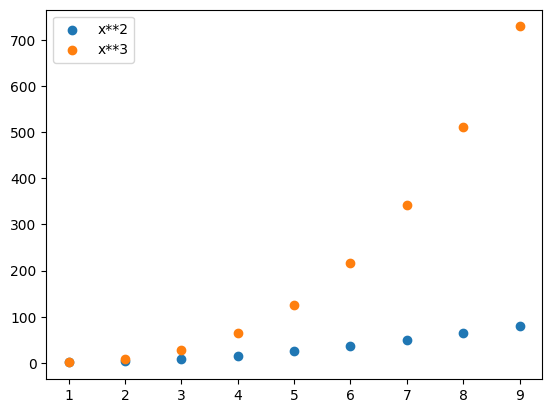

In [24]:
plt.scatter(x, y1)
plt.scatter(x, y2)
plt.legend(["x**2" , "x**3"], loc = "upper left")
plt.show() 

### Show the relationship between two variables with scatter plots

In [25]:
df = pd.read_csv("data\GOOG.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.830002,91.550003,89.019997,89.699997,89.699997,20738500
1,2023-01-04,91.010002,91.239998,87.800003,88.709999,88.709999,27046500
2,2023-01-05,88.070000,88.209999,86.559998,86.769997,86.769997,23136100
3,2023-01-06,87.360001,88.470001,85.570000,88.160004,88.160004,26612600
4,2023-01-09,89.195000,90.830002,88.580002,88.800003,88.800003,22996700


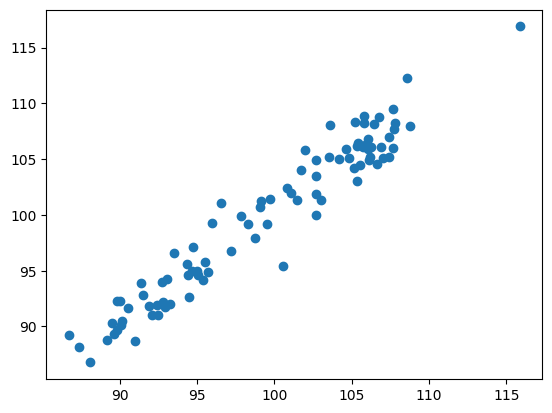

In [26]:
plt.scatter(df['Open'], df['Close'])
plt.show()

The x axis represent the Open price and the y axis represents the Close value. As expected, they are correlated and a scatter plot is able to show that.

### Scatter Plots with Marker Size 

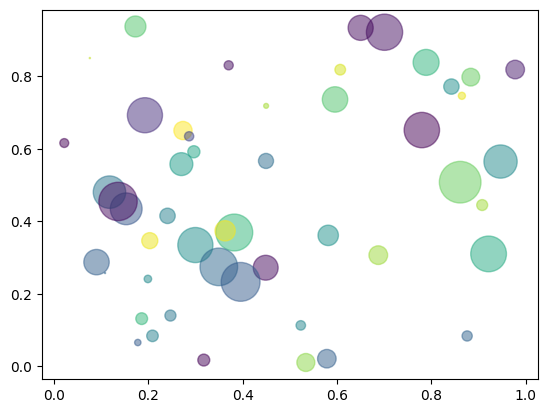

In [27]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2 

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

These are also called `bubble plots`. We will see more examples in the next lecture.

## Scatter Plots for the Canada Immigration Dataset

In [28]:
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Use a `scatter plot` to visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

In [29]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_canada[years].sum(axis=0))



In [30]:
df_tot.head()

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


In [31]:
# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [32]:
df_tot['year'].max()

2013

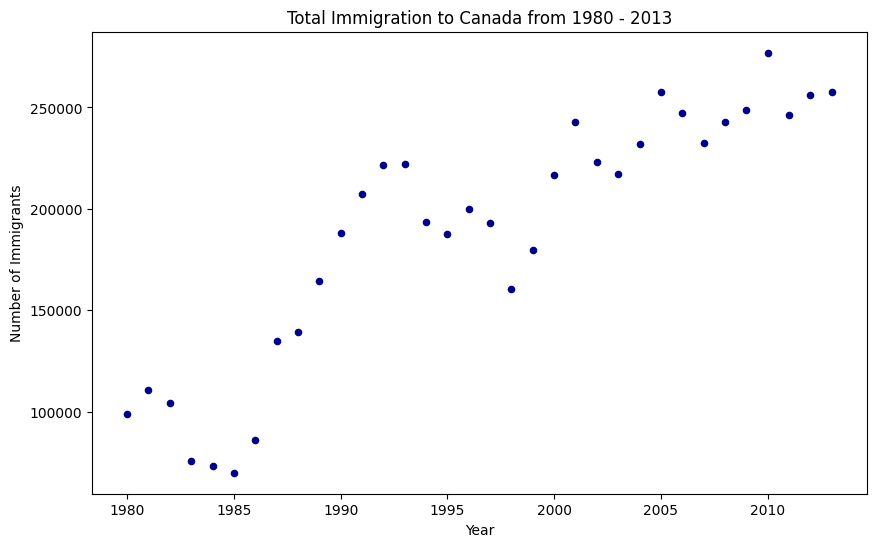

In [33]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

### Regression Line

We will plot a linear line of best fit and use it to  predict the number of immigrants in 2015.

**Step 1:** Get the equation of line of best fit. 

We will use **Numpy**'s `polyfit()` method by passing in the following:
*   `x`: x-coordinates of the data.
*   `y`: y-coordinates of the data.
*   `deg`: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [34]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. 

Since we are plotting a linear regression `y= a * x + b`, our output has 2 elements `[5.56709228e+03, -1.09261952e+07]` (the slope in position 0 and intercept in position 1).

**Step 2:** Plot the regression line on the `scatter plot`.

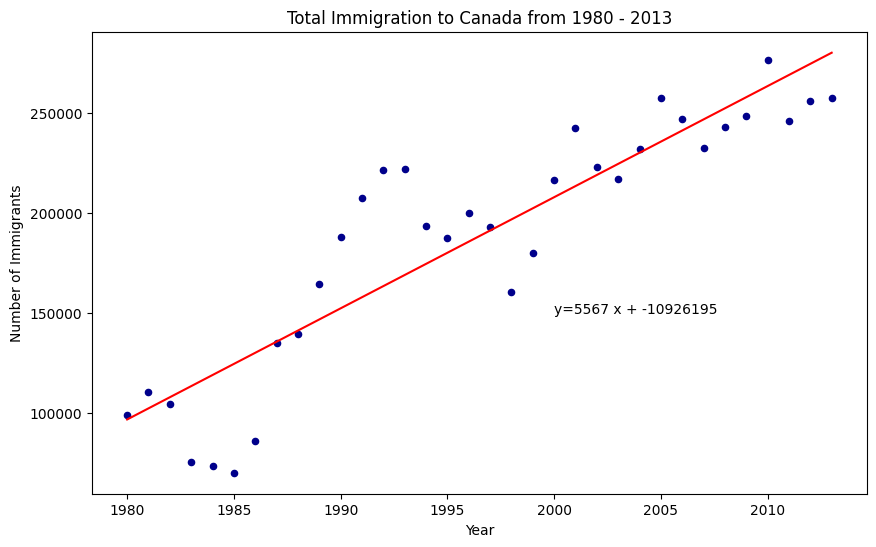

In [35]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
#'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

Using the equation of line of best fit, we can estimate the number of immigrants in 2015:

```python
No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310
```

When compared to the actual from Citizenship and Immigration Canada's (CIC) [2016 Annual Report](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2022-01-01), we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from United Nations (and might differ slightly from CIC data).

**<p style="color:red">EXERCISE 3</p>**

Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013.

* The plot should have a title.
* The x and y axis should have a title.
* Make any changes you think it make the plot better!
* Plot a linear line of best fit for this data.

In [28]:
# Your solution here...



# Box Plots

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions:

*   **Minimum:** The smallest number in the dataset excluding the outliers.
*   **First quartile:** Middle number between the `minimum` and the `median`.
*   **Second quartile (Median):** Middle number of the (sorted) dataset.
*   **Third quartile:** Middle number between `median` and `maximum`.
*   **Maximum:** The largest number in the dataset excluding the outliers.

*also known as Whisker plot*

General reference on boxplots and their history: https://vita.had.co.nz/papers/boxplots.pdf

<img src="images/boxplot_complete.png" align="center" width=500>

## Syntax

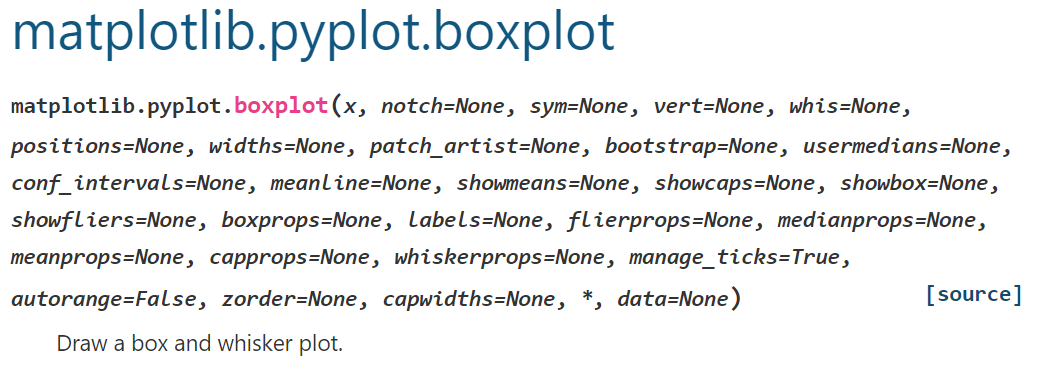

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

## First Example

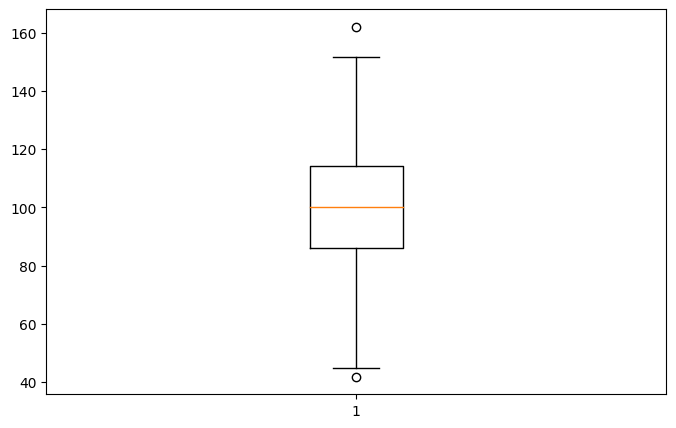

In [39]:
#np.random.seed(10)
data = np.random.normal(100, 20, 200)

fig = plt.figure(figsize=(8, 5))
plt.boxplot(data)
plt.show()

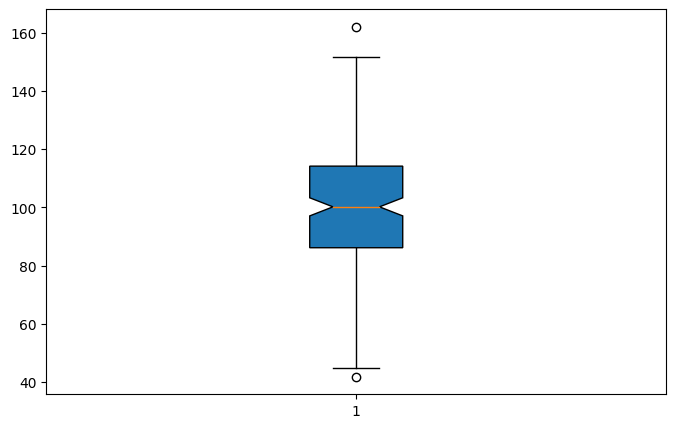

In [40]:
fig = plt.figure(figsize=(8, 5))
plt.boxplot(data, 
            notch=True,  # notch shape
            patch_artist=True # add color
           )
plt.show()

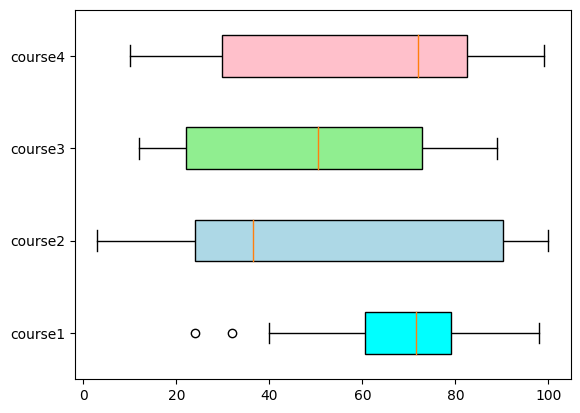

In [41]:
data1 = [82,76,24,40,67,62,75,78,71,32,98,89,78,67,72,82,87,66,56,52]
data2 = [62,5,91,25,36,32,96,95,3,90,95,32,27,55,100,15,71,11,37,21]
data3 = [23,89,12,78,72,89,25,69,68,86,19,49,15,16,16,75,65,31,25,52]
data4 = [59,73,70,16,81,61,88,98,10,87,29,72,16,23,72,88,78,99,75,30]
data = [data1, data2, data3, data4]

box = plt.boxplot(data,
                  vert=0,
                  patch_artist=True,
                  labels=['course1','course2','course3','course4'])
 
colors = ['cyan', 'lightblue', 'lightgreen', 'pink']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
 
plt.show()

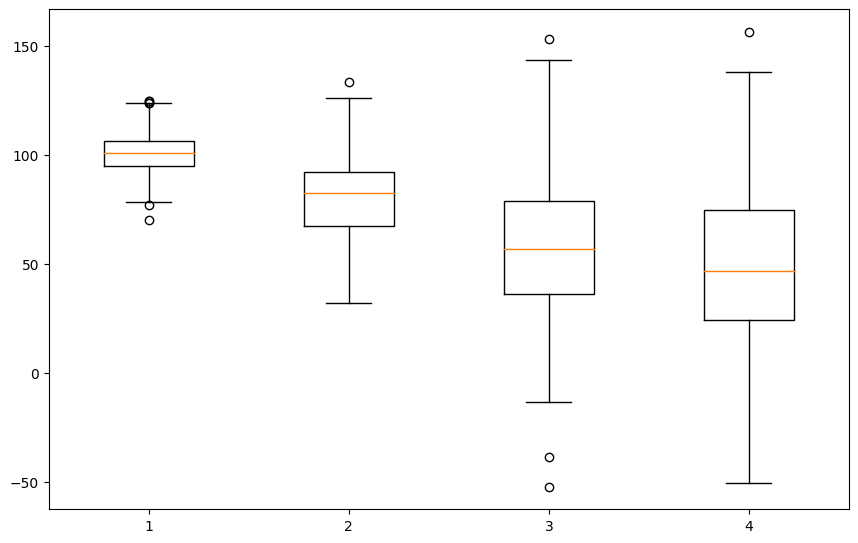

In [42]:
np.random.seed(10)  
  
data1 = np.random.normal(100, 10, 200)  
data2 = np.random.normal(80, 20, 200)  
data3 = np.random.normal(60, 35, 200)  
data4 = np.random.normal(50, 40, 200)  
data = [data1, data2, data3, data4] 
  
figure = plt.figure(figsize=(8, 5))  
ax = figure.add_axes([0, 0, 1, 1])  
bp = ax.boxplot(data)  

plt.show()  

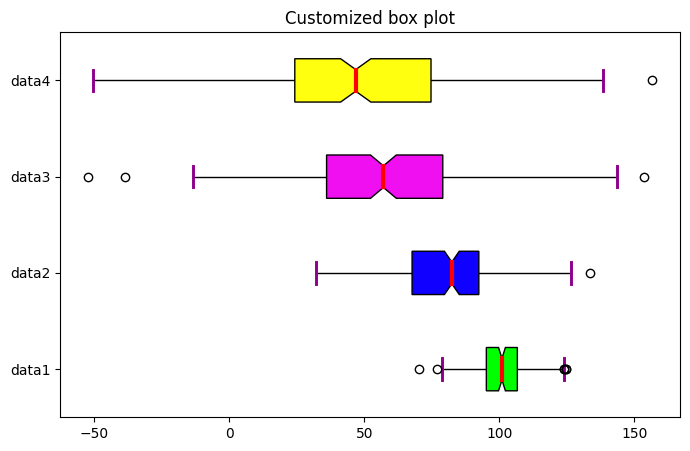

In [33]:
figure = plt.figure(figsize=(8, 5))  
ax = figure.add_subplot(111)  

bp = ax.boxplot(data, 
                patch_artist=True,
                notch=True, 
                vert = 0)  

colors = ['#00FF00','#0F00FF', '#F00FF0','#FFFF0F']  
for patch, color in zip(bp['boxes'], colors):  
    patch.set_facecolor(color)  

#for whisker in bp['whiskers']:  
#    whisker.set(color ='#8E008B',linewidth = 1.4,linestyle =":")  

for cap in bp['caps']:  
    cap.set(color ='#8E008B',linewidth = 2.1)  

for median in bp['medians']:  
    median.set(color ='red',linewidth = 3)  

#for flier in bp['fliers']:  
#    flier.set(marker ='D',color ='#d7298c',alpha = 0.6)   

ax.set_yticklabels(['data1', 'data2','data3', 'data4'])  
plt.title("Customized box plot")  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()    
plt.show()  

Check out more examples following the links below for artist customization in box plots: 

https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html

https://matplotlib.org/stable/gallery/statistics/boxplot.html



## Box Plots for the Canada Immigration Dataset

Use a box plot to show the Japanese immigrants between 1980 - 2013.


In [44]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_canada.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


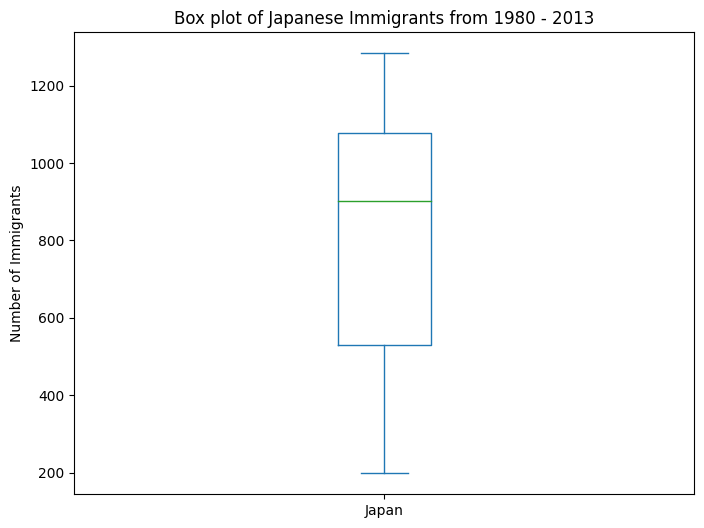

In [45]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

Key observations from the plot above:

1.  The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and  median number of immigrants is around 900 (median).
2.  25% of the years for period 1980 - 2013 had an annual immigrant count of \~500 or fewer (First quartile).
3.  75% of the years for period 1980 - 2013 had an annual immigrant count of \~1100 or fewer (Third quartile).


In [46]:
df_japan.min()

Country
Japan    198
dtype: int64

In [47]:
df_japan.max()

Country
Japan    1284
dtype: int64

Recall the method `describe()` - it shows the actual numbers of the boxplot.

In [48]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [49]:
df_romania = df_canada.loc[['Romania'], years].transpose()
df_romania.head()

Country,Romania
1980,375
1981,438
1982,583
1983,543
1984,524


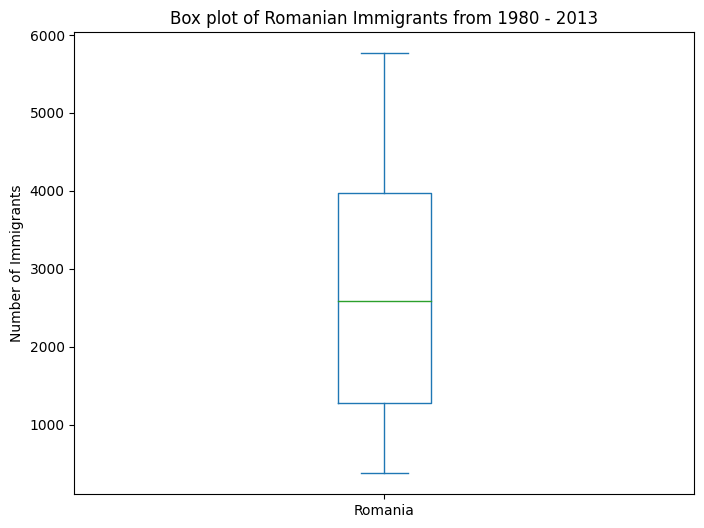

In [50]:
df_romania.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Romanian Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

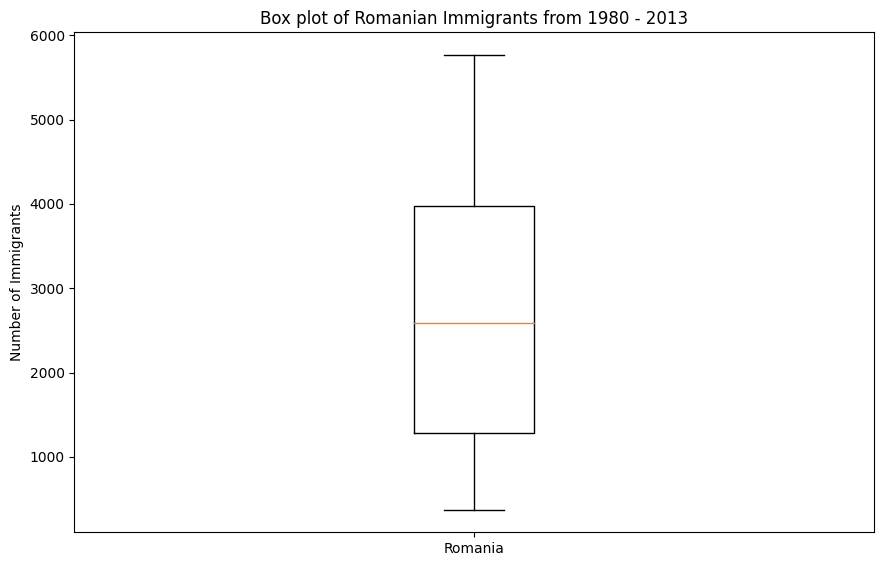

In [51]:
figure = plt.figure(figsize=(8, 5))  
ax = figure.add_axes([0, 0, 1, 1])  
bp = ax.boxplot(df_romania, labels=['Romania'])  
plt.title('Box plot of Romanian Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.show()  

**<p style="color:red">EXERCISE 4</p>**

Create a box plot to compare the distribution of the number of new immigrants from Romania and Poland for the period 1980 - 2013.

* The plot should have a title.
* The x axis should display labels for each box plot.
* The y axis should have a title.
* The median line of each box plot should be black and have line width 2.
* Make sure to customize the looks of: whiskers, colors of box plots and outliers.

In [42]:
# Your solution here...



# Subplots

See first lecture on Matplotlib Introduction.

A **`figure`** (overall canvas) can be divided into **`subplots`**, each containing a plot. With **subplots**, we usually work with the *artist layer* instead of the *scripting layer*.
This helps when we want to visualize multiple plots together. 


Syntax: <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

*   `nrows` and `ncols` are used to split the figure into (`nrows` \* `ncols`) sub-axes,
*   `plot_number` is used to identify the particular subplot. It starts at 1 and increments across rows first and has a maximum value of `nrows` \* `ncols`.

<img src="images/Subplots.png" align="center" width=500>

### Example of use

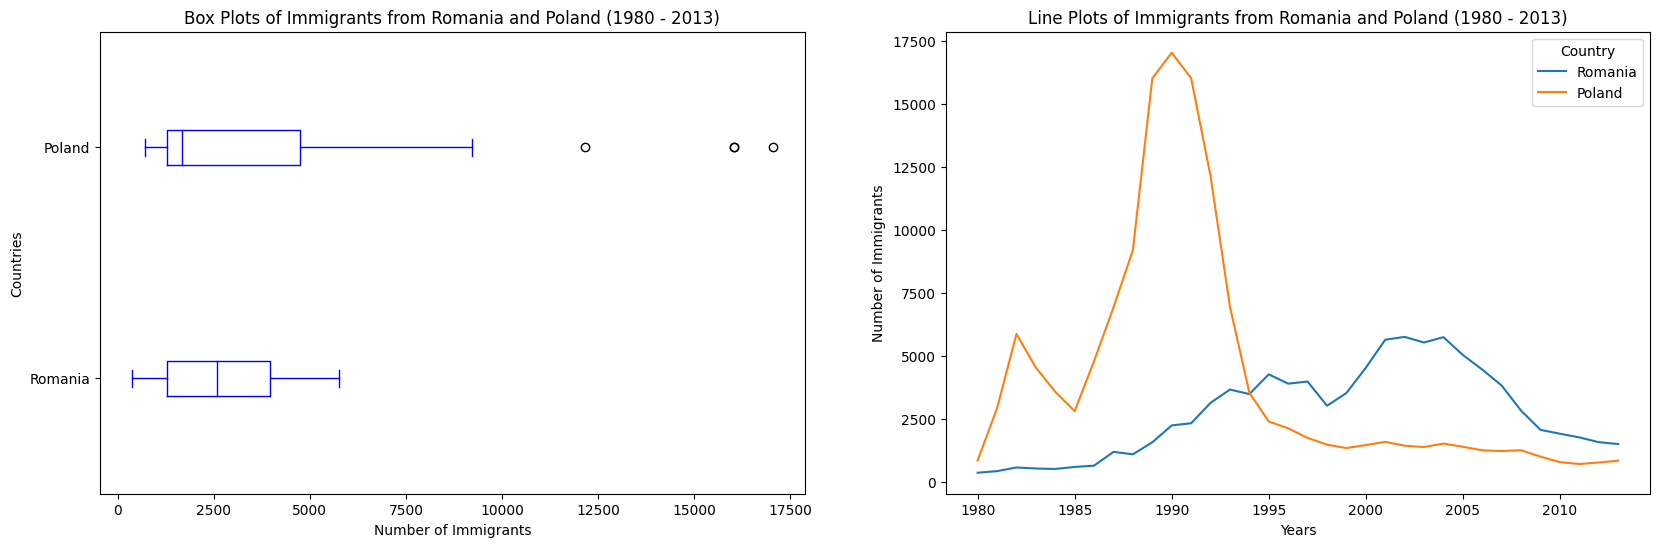

In [52]:
df_RP= df_canada.loc[['Romania', 'Poland'], years].transpose()

fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: Box plot
df_RP.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) 
ax0.set_title('Box Plots of Immigrants from Romania and Poland (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_RP.plot(kind='line', figsize=(20, 6), ax=ax1) 
ax1.set_title ('Line Plots of Immigrants from Romania and Poland (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

**Subplot convention**

If `nrows`, `ncols` and `plot_number` are all less than 10, we can use the following convenience: a 3-digit number can be given, where the hundreds represent `nrows`, the tens represent `ncols` and the units represent `plot_number`. 

For instance,

```python
   subplot(211) == subplot(2, 1, 1) 
```

produces a subaxes in a figure which represents the top plot in a 2 rows X 1 column grid.


## Another boxplot for the Canada Dataset

Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the *decades* `1980s`, `1990s` and `2000s`.

In [53]:
#Step 1: Get the dataset. Get the top 15 countries based on Total immigrant population. 

df_top15 = df_canada.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [54]:
#Step 2: Create a new dataframe which contains the aggregate for each decade.

# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

# slice the original dataframe df_canada to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

# display dataframe
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [46]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


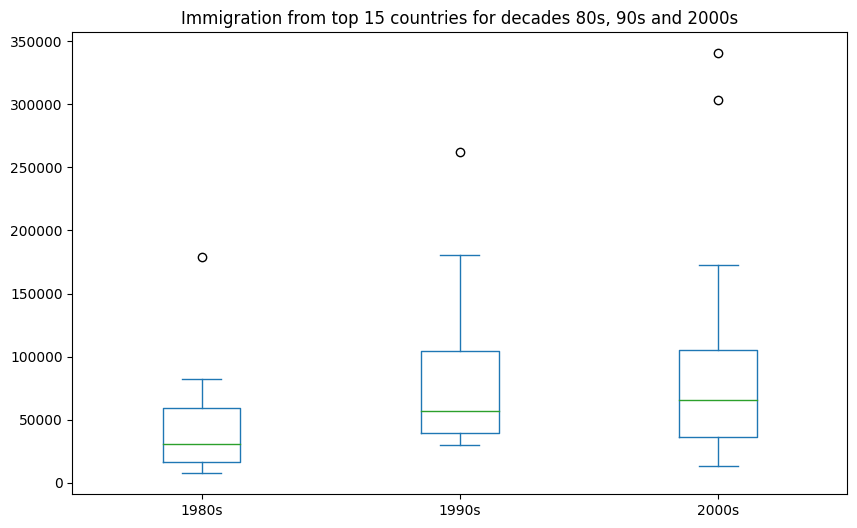

In [55]:
new_df.plot(kind='box', figsize=(10, 6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()

**Outliers**

The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:<br>

*   larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
*   smaller than Q1 by at least 1.5 times the IQR.

<img src="images/boxplot.png" align="center" width=500>

For the decade 2000s this means: <br>

*   Q1 (25%) = 36,101.5 <br>
*   Q3 (75%) = 105,505.5 <br>
*   IQR = Q3 - Q1 = 69,404 <br>

Any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 \* 69,404) <br>
Outlier > 209,611.5


In [48]:
# how many entries fall above the outlier threshold ?
new_df=new_df.reset_index()
new_df[new_df['2000s']> 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


China and India are both considered as outliers since their population for the decade 2000s exceeds 209,611.5.

**<p style="color:red">EXERCISE 5</p>**

Create a figure with 3 subplots as follows: 
1. A box plot to compare the distribution of the number of new immigrants from Romania, Hungary and Bulgaria for the period 1980 - 2013.
2. A line plot for the same data
3. A scatter plot for the same data

* The figure should have a title (not each subplot).
* The 3 sublpots should be placed on the same line.
* Customize each plot as you see best fit.

In [49]:
# Your solution here...

